## Graph #1: Residuals vs. Fits

Before starting this lesson, let's load up the data and construct the model that we'll need. We'll be working with a dataset of income vs. car-related spending:

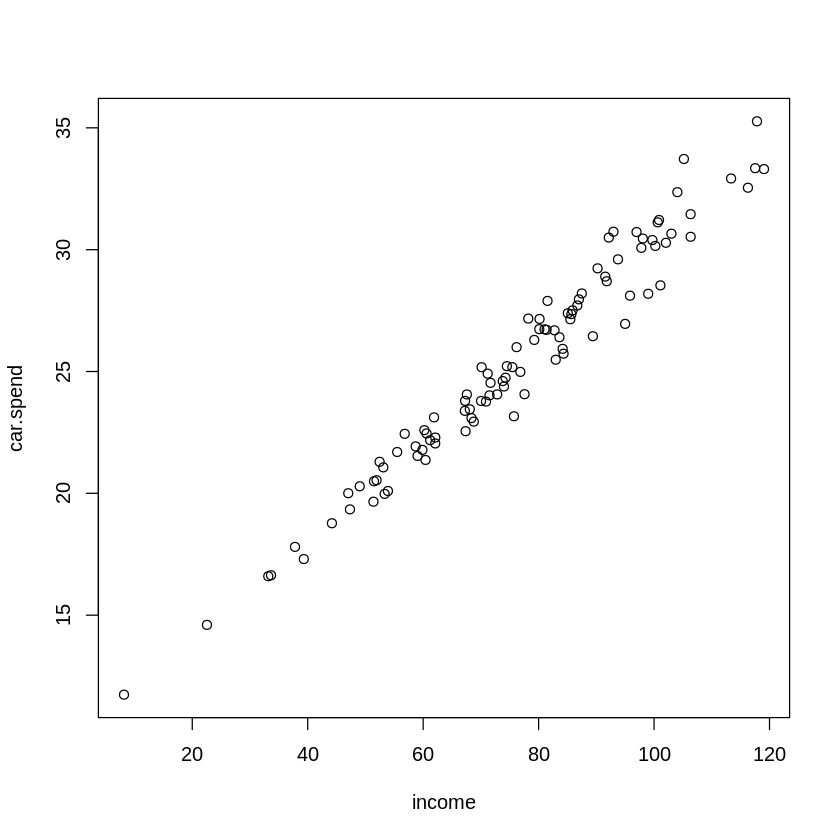

In [1]:
car.df <- read.csv("data/car-spend.csv")
plot(car.spend ~ income, data=car.df)
p <- recordPlot()

A dataset like the above would be quite useful if, for example, we were attempting to understand customer value in the auto industry. Let's fit a line to this data:

In [2]:
model <- lm(car.spend ~ income, data=car.df)
summary(model)


Call:
lm(formula = car.spend ~ income, data = car.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24286 -0.47790  0.03947  0.48252  2.44720 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.804889   0.312265   31.40   <2e-16 ***
income      0.204161   0.003942   51.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8527 on 98 degrees of freedom
Multiple R-squared:  0.9647,	Adjusted R-squared:  0.9644 
F-statistic:  2682 on 1 and 98 DF,  p-value: < 2.2e-16


We plot this line below:

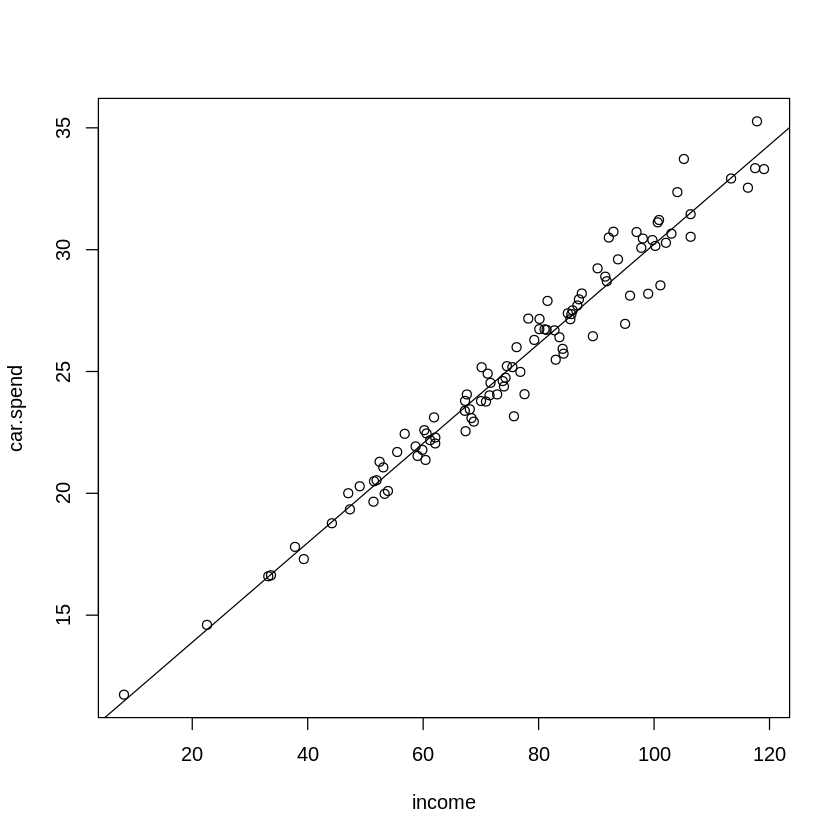

In [3]:
replayPlot(p)
abline(model)

The key feature that you should notice from the graph above is that the spread of the points is not even - the points spread out wider from the line as we move to the right. Datasets with income as an independent variable often show this pattern, because the variability of consumer spending in a given category increases with higher income. Intuitively, this makes sense. Some high-income consumers buy expensive cars; others do not. However, lower-income consumers cannot buy expensive cars at all, which causes their spending on cars to have lower variability than that of their high-income counterparts. 

This property of non-uniform variance across the range of our data has a long and confusing name: *heteroskedasticity* (also spelled *heteroscedasticity*) - heteroskedasticity is troublesome both because it is difficult to spell and also because its presence makes our task of calculating prediction and parameter confidence intervals much harder.

## Detecting Heteroskedasticity

Let's pull up the four graphs that we will be using in this course to check our model assumptions:

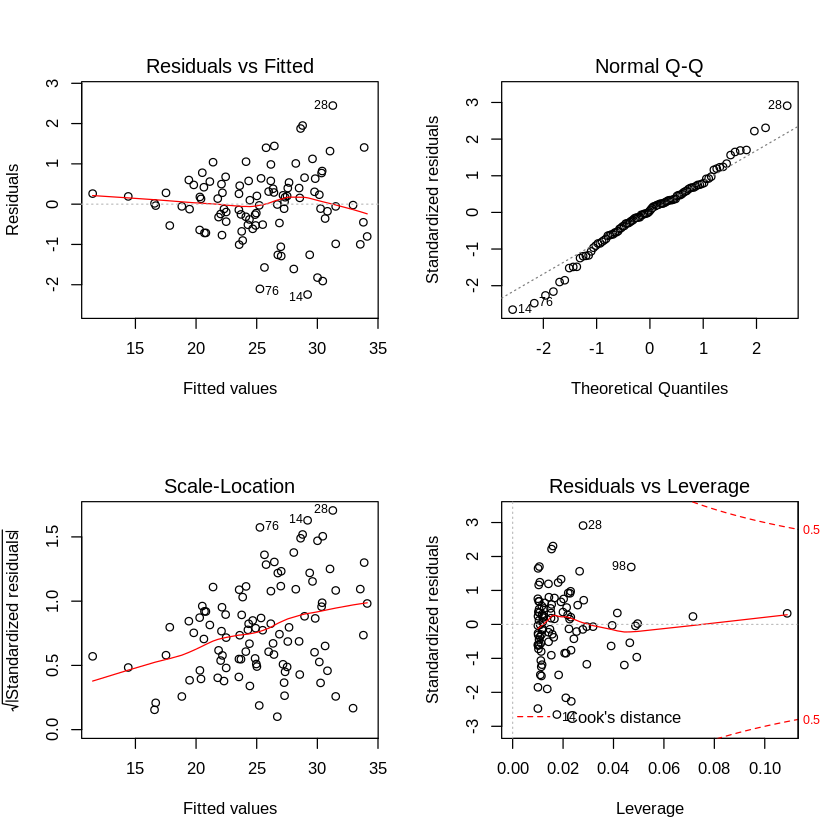

In [4]:
old.par <- par(no.readonly=TRUE)
par(mfrow=c(2,2))
plot(model)
par(old.par)

In this lesson, we are going to zoom in on the very first graph, which is the *Residuals vs. Fitted Values* plot - we can do this using the `which` argument:

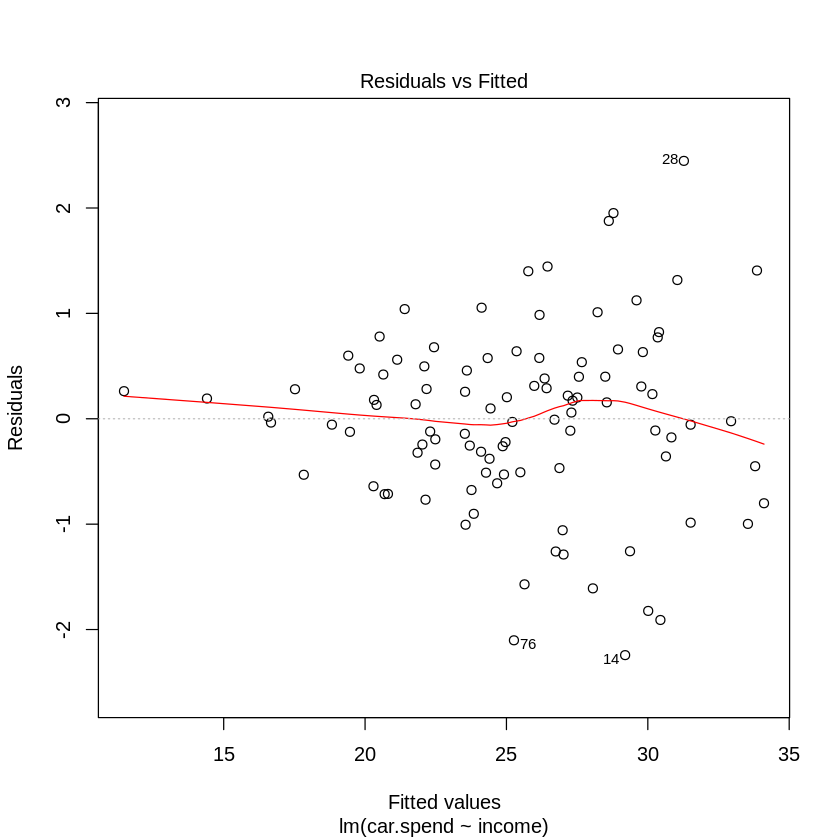

In [5]:
plot(model, which=1)

The graph above displays the classic "cone shape" that indicates the presence of heteroskedasticity - we can see that our residuals spread out significantly at larger values of the dependent variable. This degree of heteroskedasticity will make our confidence and prediction intervals unreliable. 

There are a variety of techniques available to mitigate heteroskedasticity, but they are beyond the scope of this lesson. For now, your goal should be to gain confidence in your ability to detect heteroskedasticity so that you can moderate the degree of trust that you place in your model accordingly. 

## Nonlinearity

We can also use the residuals vs. fitted values plot to identify the presence of a *nonlinear* relationship between our dependent and independent variables. Such nonlinearity makes it inappropriate to apply a linear model to our data; any predictions derived from such a model would be untrustworthy.

Let us consider an example of a nonlinear relationship between advertising spending and sales, as shown below:

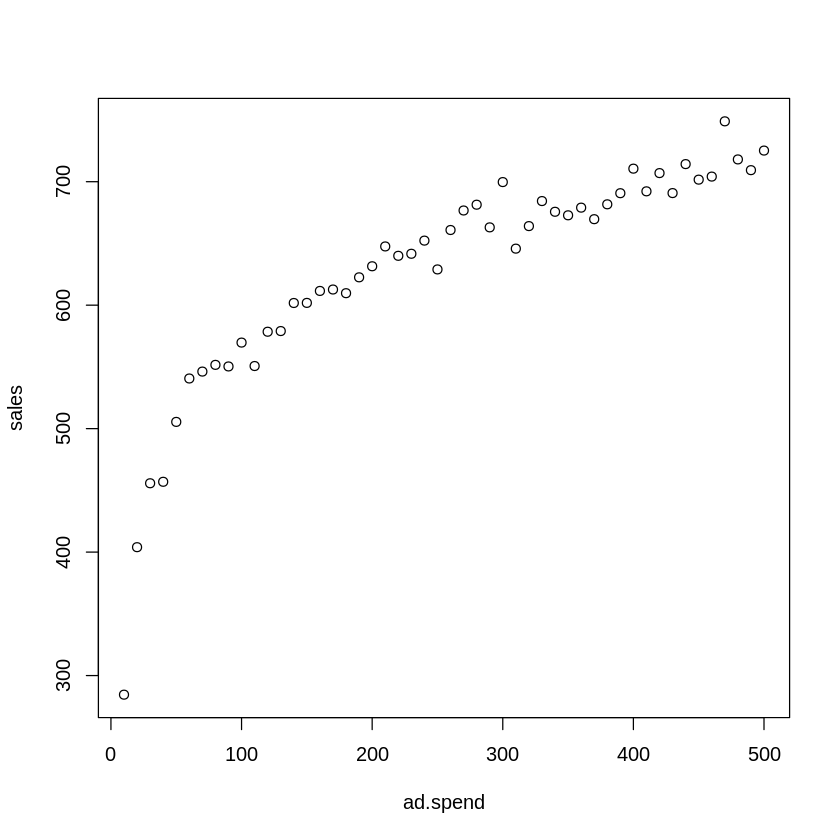

In [6]:
ads.df <- read.csv("data/ad-spend-nonlinear.csv")
plot(
    sales ~ ad.spend, 
    data=ads.df
)
p.ads <- recordPlot()

We can see that the curve bends downward for higher levels of `ad.spend`, indicating that we have saturated the market with advertising and are experiencing diminishing returns on our spending. While we can still fit a line to this data, it is readily apparent that it does not fit very well:

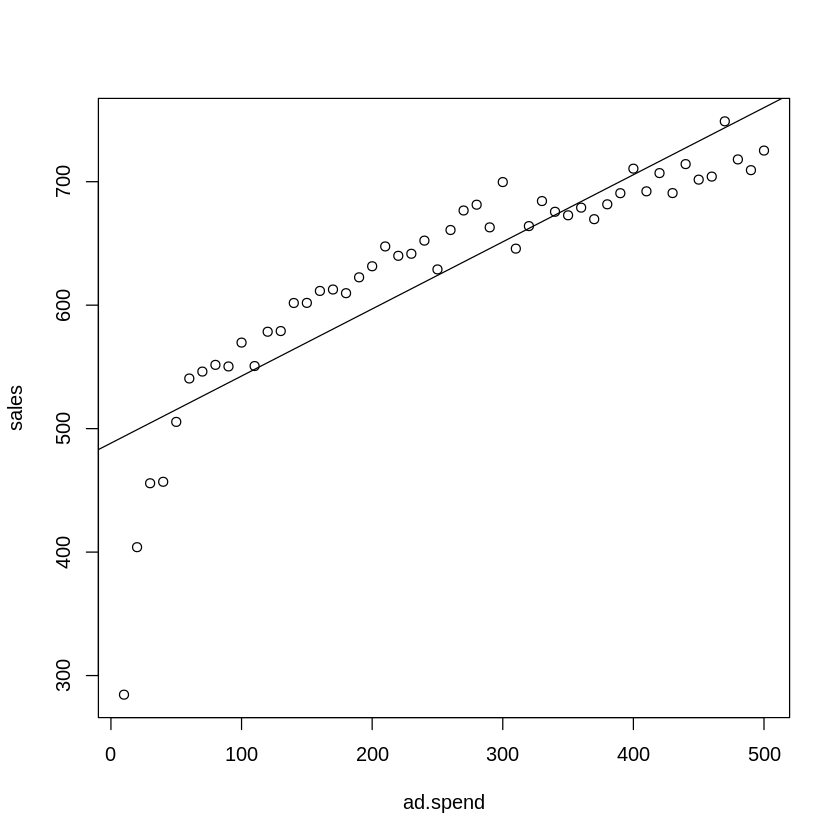

In [7]:
model.ads <- lm(
    sales ~ ad.spend, 
    data=ads.df
)
replayPlot(p.ads)
abline(model.ads)

The residual vs. fitted values plot is quite useful for detecting such nonlinearity. Let's construct this plot for our advertising model below:

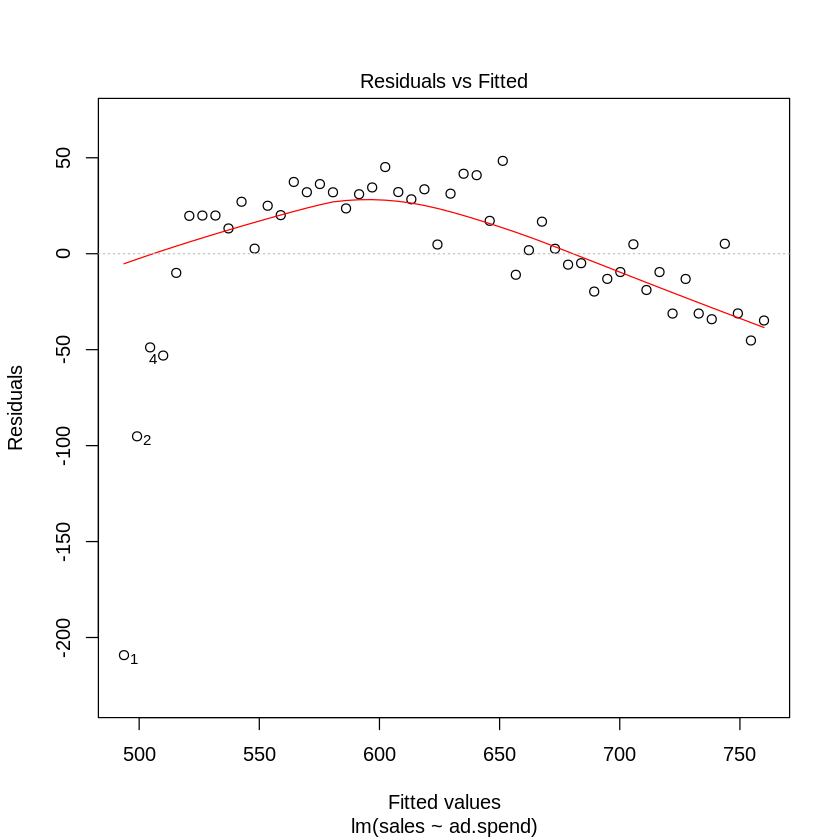

In [8]:
plot(model.ads, which=1)

We can now see that, in contrast to the previous example, our residuals are not evenly scattered above and below the zero line but rather show a distinct pattern indicating that the model consistently overstimates in certain regions and underestimates in others. This indicates that the relationship we are trying to model is nonlinear and the use of a linear model is inappropriate in this context.

<span style="color:blue;font-weight:bold">Exercise</span>: Perform the following actions:

* Load the data contained in the file `data/fuel-consumption.csv` and store it in the dataframe `fuel.df`
* Create a linear model for the relationship `DistanceTraveledKM ~ FuelConsumedL` and store the result in the variable `model.fuel` 
* Use `plot` as shown above to produce a Residual vs. Fitted Values plot for `model.fuel`
* Set the value of the variable `is.heteroskedasticity` to `TRUE` if you observe heteroskedasticity, otherwise set it to `FALSE`
* Set the value of the variable `is.nonlinearity` to `TRUE` if you observe nonlinearity, otherwise set it to `FALSE`

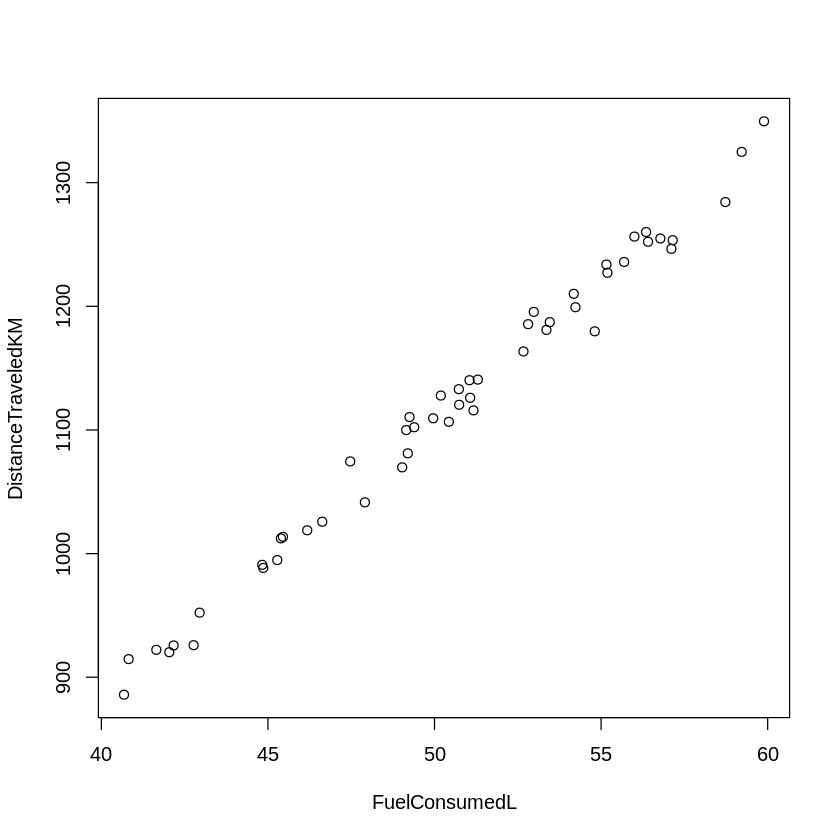

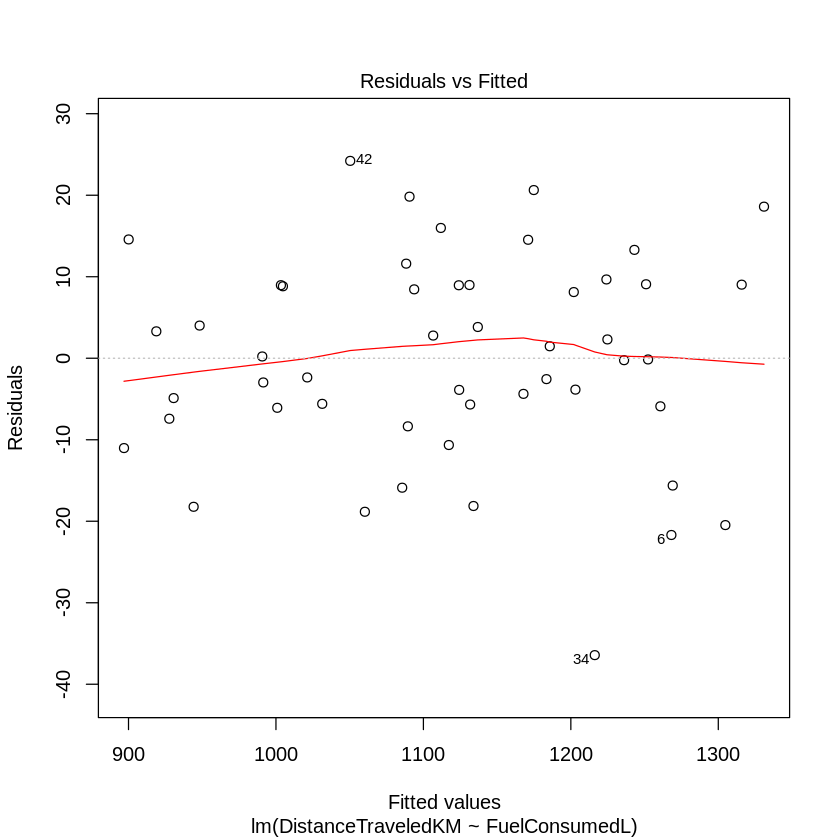

In [16]:
# delete this entire line and replace it with your code

fuel.df <- read.csv('data/fuel-consumption.csv')

model.fuel <- lm(DistanceTraveledKM ~ FuelConsumedL, data=fuel.df)
plot(DistanceTraveledKM ~ FuelConsumedL, data=fuel.df)
plot(model.fuel, which=1)

is.heteroskedasticity  <- FALSE
is.nonlinearity <- FALSE

In [17]:
correct.fuel.df <- read.csv("data/fuel-consumption.csv")
check.variable.value("fuel.df", correct.fuel.df)
correct.model.fuel <- lm(DistanceTraveledKM ~ FuelConsumedL, data=correct.fuel.df)
check.variable.definition("model.fuel")
assert.true(all(coefficients(model.fuel) == coefficients(correct.model.fuel)), "Did you create <code>model.fuel</code> correctly?")
check.variable.definition("is.heteroskedasticity")
check.variable.definition("is.nonlinearity")
assert.true(!is.heteroskedasticity, "<code>is.heteroskedasticity</code> should be set to <code>FALSE</code> as there does not appear to be significant heteroskedasticity in this dataset.")
assert.true(!is.nonlinearity, "<code>is.nonlinearity</code> should be set to <code>FALSE</code> as there does not appear to be significant nonlinearity in this dataset.")
success()

Correct!